# Исследование данных о продажах компьютерных игр, поиск факторов, определяющих их успешность

В нашем распоряжении данные из открытых источников (до 2016 года): 
* исторические данные о продажах игр
* оценки пользователей и экспертов 
* жанры 
* платформы

Цель работы - выполнить предобработку данных, изучить их, найти интересные особенности и определяющие успешность игры зависимости, сформулировать и проверить несколько гипотез. Полученный анализ должен стать инструментом, который позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017-й интернет-магазину, который продаёт по всему миру компьютерные игры.

## 1. Подготовка данных

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# импорт данных
data = pd.read_csv(
    'C:/DataAnalysis/initial_data/project_5/games.csv')

In [3]:
data.head(5) # знакомство с массивом данных

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info() # знакомство с массивом данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 1.1 Предобработка

#### 1.1.1 Приведение названий столбцов к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### 1.1.2 Преобразование типов данных в столбцах

Изучим уникальные значения для выбора типа данных у столбцов, где имеется исходных формат, потенциально не позволяющий полноценно их использовать: 
* year_of_release - float64
* user_score - object

In [6]:
display(data['year_of_release'].sort_values().unique())
display(data['user_score'].sort_values().unique())

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Даты релизов представлены просто только годами. Преобразовывать именно в формат дат года нет смысла, для анализа подойдет просто конвертация их типа в целые числа.

In [7]:
data['year_of_release'] = data['year_of_release'].astype('Int64') # преобразуем год релиза в целые значения
display(data['year_of_release'].sort_values().unique())

<IntegerArray>
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, <NA>]
Length: 38, dtype: Int64

В столбце user_score присутствует строковое значение 'tbd', которое не позволяет преобразовать столбец из object в float.

В следующих этапах нам вероятно понадобиться использование данного столбца именно как числового, таким образом, нужно понять, что обозначает 'tbd'.

'tbd' - to be determined = будет определено. Таким образом, это значение относится к играм, которые еще не были оценены. 
Для дальнейшей работы необходимо заменить это значение на пустоты.

Перед удалением проверим, относится ли 'tbd' только к самым свежим играм 2016г или ко всему массиву данных. Эти особенности сможем учесть при последующих выводах. 

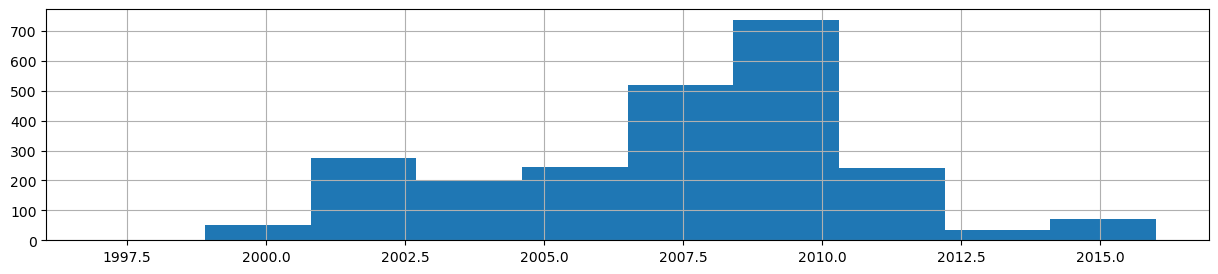

In [8]:
# уточнение, не относится ли значение "tbd" к новым играм, которые еще не были оценены 
data[data.user_score == "tbd"]['year_of_release'].hist(bins = 10, figsize = (15,3));

'tbd' присутствует во многих годах, поэтому приравниваем его значение к отсутствию информации.

In [9]:
# замена "tbd" на Nan
data.loc[data['user_score'] == 'tbd', 'user_score'] = data.loc[data['user_score']=='nan', 'user_score'] 
data['user_score'] = data['user_score'].astype('float') 

##### Комментарий: причины замен типов данных

С целью дальнейшей работы с параметрами (графики, расчет статистических параметров) выполнена замена типов данных в столбцах с годом релиза (дробные float изменены на целые int) и с пользовательским рейтингом (object в float)

#### 1.1.3 Обработка пропусков

In [10]:
# определение, в каких столбцах есть пропуски
# функция для визуализации кол-ва пропусков
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (20,4), legend = False, fontsize = 16)
            .set_title('Пропуски данных' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

user_score         9125
critic_score       8578
rating             6766
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

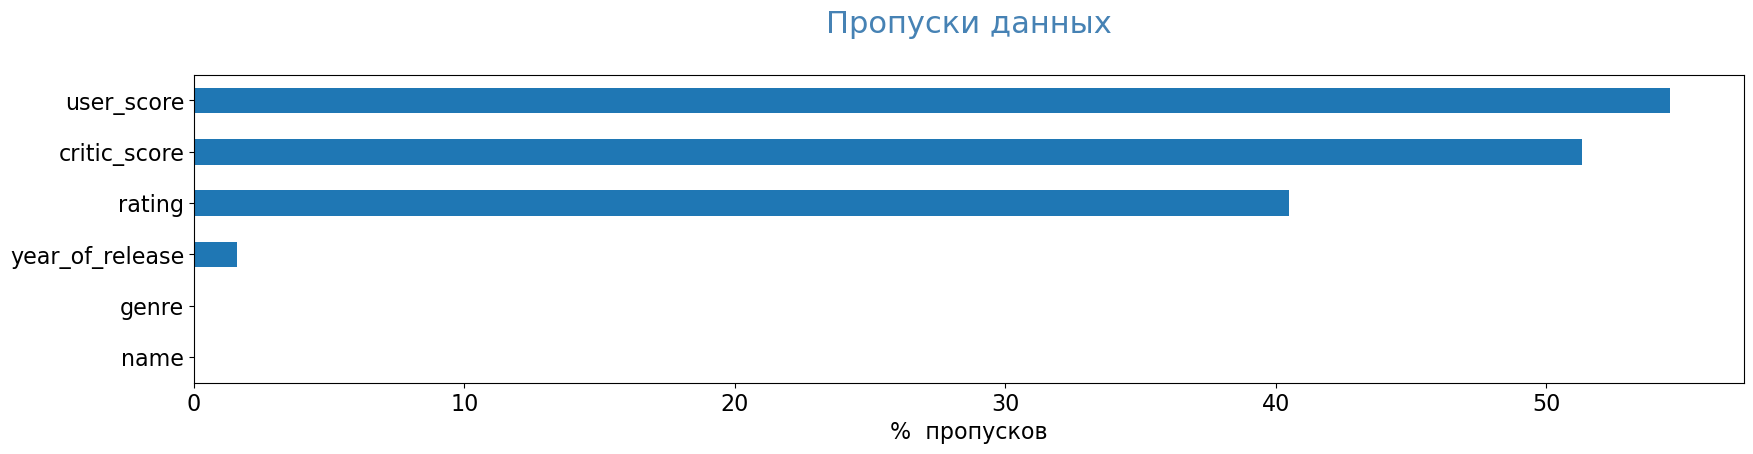

In [11]:
pass_value_barh(data)
plt.xlabel('%  пропусков', fontsize = 16)
data.isna().sum().sort_values(ascending=False)

Всего в 6 столбцах имеются пропуски.

Пропуски в первых 4 верхних столбцах невозможно восстановить аналитическими способами, только собрав информацию из других источников. Сделаем предположение, что отсутствие данных здесь обозначает от отсутствие этих данных в открытом доступе.

Рассмотрим детально оставшиеся три столбца:

In [12]:
# вывод уникальных значений для определения целесообразности обработки пропусков
display(data[data.name.isna()])
display(data[data.genre.isna()]) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
# удаление строк с пустыми именами и жанрами
data = data.dropna(subset = ['name'])

user_score         9123
critic_score       8576
rating             6764
year_of_release     269
name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

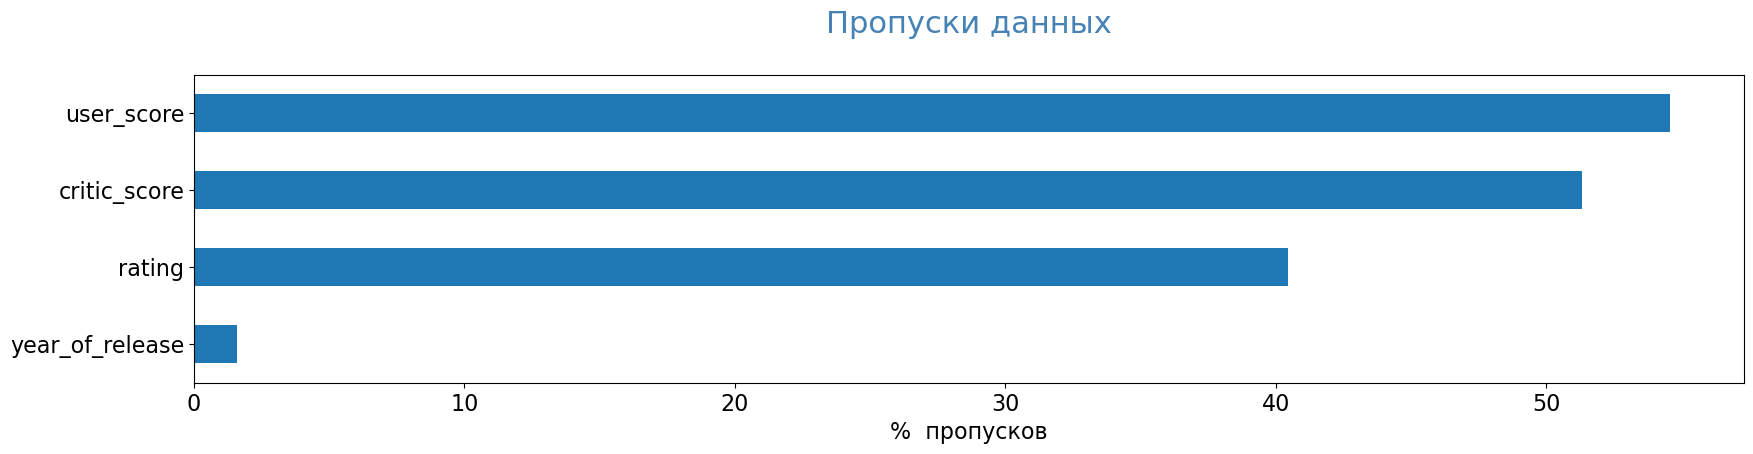

In [14]:
pass_value_barh(data)
plt.xlabel('%  пропусков', fontsize = 16)
data.isna().sum().sort_values(ascending=False)

##### Комментарий: причины выполнения обработки пропусков 

Пропуски в названии игр и жанра пропущены у одних и тех же строк. Данные неполные, всего 2 значения, для анализа роли не сыграют, принимает решение об удалении строк. Наиболее вероятная причина пропусков - тех. ошибка при сведении данных, либо человеческий фактор. 

Пропуски в оценках критиков, пользователей,  рейтинге ESRB и годе выпуска могут быть связаны с техническими ошибками при выгрузке/своде данных, либо с их отсутствием.

### 1.2 Расчет суммарных продаж во всех регионах

In [15]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [16]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### 1.3 Проверка на наличие дубликатов

In [17]:
data['name'] = data['name'].str.lower() # в столбце с множеством уникальных значений приведем все к нижнему регистру

In [18]:
data.duplicated().value_counts() # поиск явных дубликатов

False    16713
dtype: int64

Явных дубликатов в данных нет, выполним проверку на наличие неявных дубликатов

In [19]:
# в столбцах с небольшим количеством уникальных значений проверим дубликаты визуально
display(data['platform'].sort_values().unique())
display(data['genre'].sort_values().unique())
display(data['rating'].sort_values().unique())

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Все значения выше - уникальные. 

Проработаем столбец с названиями игр.

In [20]:
data['name'].value_counts().head(5) #

need for speed: most wanted    12
ratatouille                     9
lego marvel super heroes        9
fifa 14                         9
madden nfl 07                   9
Name: name, dtype: int64

Вполне вероятно, что игры могли выходить на многих платформах или появляться римейки в разные годы на одних и тех же платформах, поэтому, например, выход need for speed: most wanted на 12 платформах не выглядит нереалистичным. Но для исключения вероятности наличия дубликатов выполним проверку по трем условиям: одинаковое название игры, платформы и года выпуска.

In [21]:
data[data.duplicated(['name','platform', 'year_of_release'],keep = False)].sort_values(by = 'name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,madden nfl 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,madden nfl 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Найден единственный дубликат, удалим строку 16230 (выбираем ее, т.к. большая часть значений близка к 0)

In [22]:
data = data.drop(labels = [16230],axis = 0)
    
data[16227:16231] # проверка отсутствия строки

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16229,dr. slump & arale-chan,DS,2008,Adventure,0.0,0.0,0.01,0.0,NaN,NaN,NaN,0.01
16231,umineko no naku koro ni portable 1,PSP,2011,Adventure,0.0,0.0,0.01,0.0,NaN,NaN,NaN,0.01
16232,festa!! hyper girls party,PS2,2006,Adventure,0.0,0.0,0.01,0.0,NaN,NaN,NaN,0.01
16233,geten no hana: yume akari,PSP,2014,Misc,0.0,0.0,0.01,0.0,NaN,NaN,NaN,0.01


In [23]:
data.duplicated().value_counts() # поиск явных дубликтов

False    16712
dtype: int64

## 2. Исследовательский анализ данных

### 2.1 Количество релизов игр по годам 

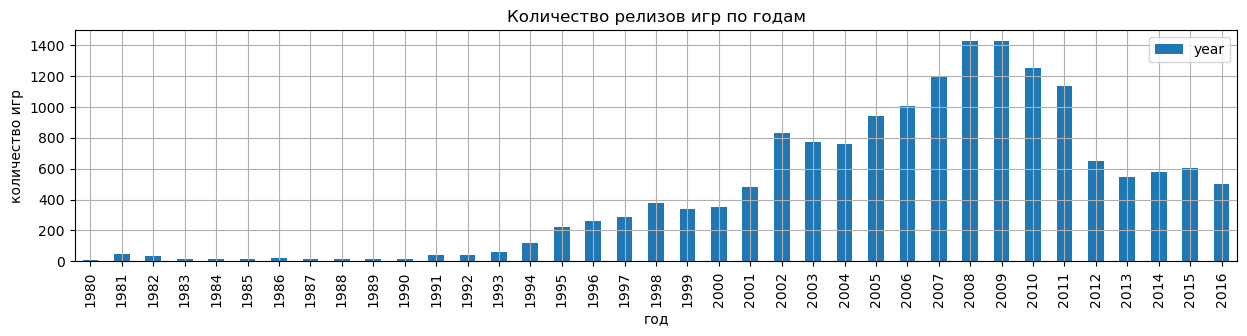

In [24]:
data.groupby(['year_of_release']).agg(year=('year_of_release','count')).plot(
    kind ='bar', figsize = (15,3), grid = True)

plt.title('Количество релизов игр по годам') 
plt.xlabel('год')
plt.ylabel('количество игр');

Пик выпуска игр пришелся на 2008-2009 годы. 

Наша цель - спланировать рекламные кампании на 2017-й год, сфера компьютерных игр динамично меняющаяся, поэтому данные за весь период 1980-2016 года рассматривать будет нецелесообразно.

### 2.2 Платформы с наибольшими суммарными продажами, изменение их  динамики продаж


всего платформ: 31


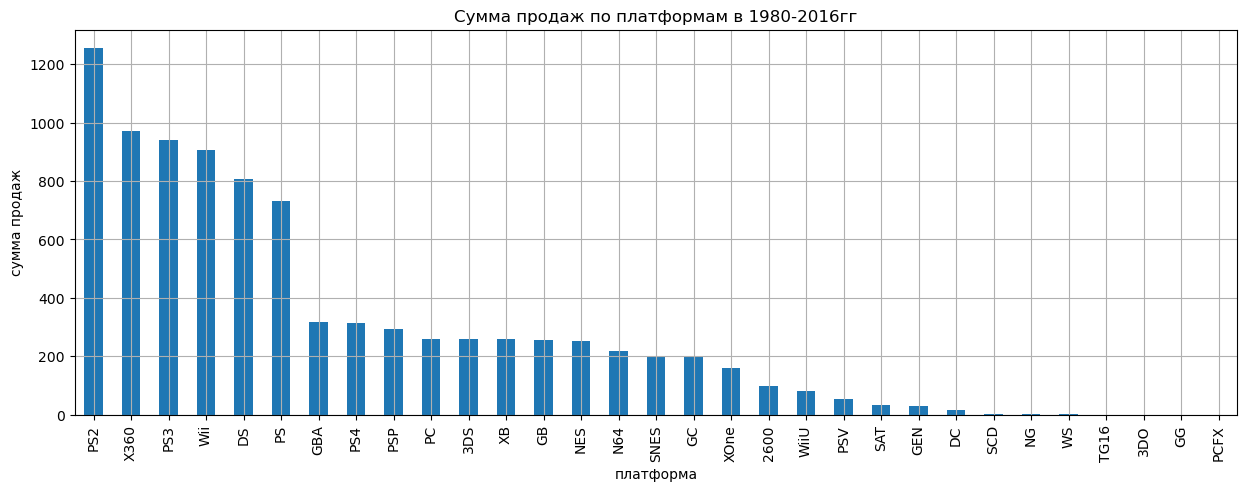

In [25]:
data.pivot_table(
    index = ['platform'],  values = ['total_sales'], aggfunc = {'total_sales':'sum'}).sort_values(
    by = 'total_sales', ascending = False).plot(
    kind ='bar', figsize = (15,5), title = 'Сумма продаж по платформам в 1980-2016гг', legend = False, grid = True);
plt.xlabel('платформа')
plt.ylabel('сумма продаж');
print('всего платформ:', len(data.platform.unique())) # количество платформ

In [26]:
# топ5 платформ за 1980-2016 года
data.pivot_table(
    index = ['platform'],  values = ['total_sales'], aggfunc = {'total_sales':'sum'}).sort_values(
    by = 'total_sales', ascending = False).head(5)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.64
Wii,907.51
DS,806.12


In [27]:
top5_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
data_top5_platforms = data.query('platform in @top5_platforms')

In [28]:
# при отображении графика ниже обнаружено одно выбивающееся ошибочное значение, заменим его на Nan
data_top5_platforms.loc[(data_top5_platforms['platform'] == 'DS') & 
                        (data_top5_platforms['year_of_release'] == 1985), 
                        'year_of_release'] = data_top5_platforms.loc[data_top5_platforms['year_of_release']==
                                                                     'nan','year_of_release']

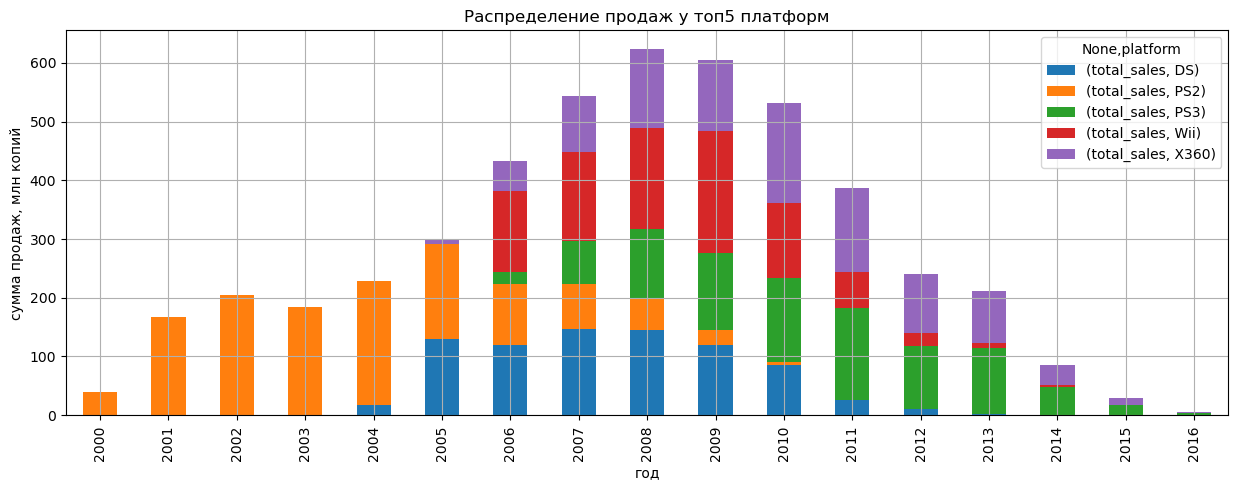

In [29]:
data_top5_platforms.pivot_table(
    index = ['year_of_release'], columns = 'platform',  values = ['total_sales'], aggfunc = {'total_sales':'sum'}).plot(
    kind ='bar', figsize = (15,5), stacked=True,  grid = True,
    title = 'Распределение продаж у топ5 платформ');
plt.xlabel('год')
plt.ylabel('сумма продаж, млн копий');

Для каждой из топ5 платформ хорошо видны примерно десятилетние "циклы жизни" со следующими трендами: от небольших объемов продаж в первый год появления платформы, роста популярности с последующим выходом на пик продаж к постепенному исчезновению. 

Это связано с появлением консолей нового поколения с более мощным железом, которое позволяет поддерживать все более и более технически сложные игры.

### 2.3 Выбор актуального периода для анализа


Рынок компьютерных игры достаточно динамическая сфера, для глубокого анализа не имеет смысла брать в расчет неактуальные старые данные. Согласно графикам из пункта 2.2 - начиная с 2012 года количество выпускаемых игр выходит на плато в 500-600 игр в год, логично предположить интерполяцию данного тренда и на наш целевой период для прогноза - 2017г. 

Таким образом, в работу берем, как наиболее показательный, период 2012-2016гг.

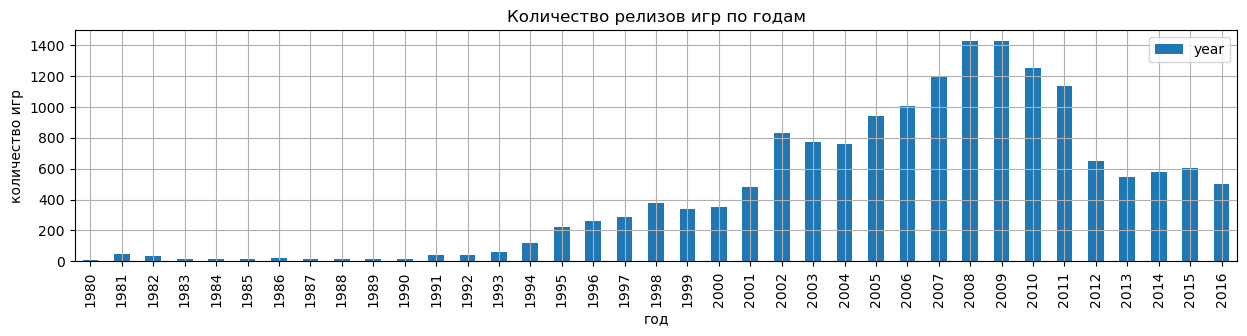

In [30]:
data.groupby(['year_of_release']).agg(year=('year_of_release','count')).plot(
    kind ='bar', figsize = (15,3), grid = True)
plt.title('Количество релизов игр по годам')
plt.xlabel('год')
plt.ylabel('количество игр');

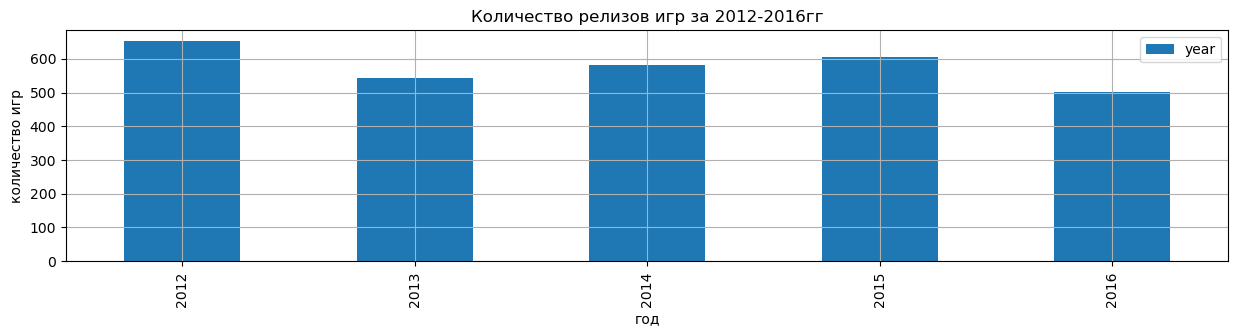

In [31]:
# зум на последние 5 лет
data_5year = data[data['year_of_release'] >= 2012]

data_5year.groupby(['year_of_release']).agg(year=('year_of_release','count')).plot(
    kind ='bar', figsize = (15,3), grid = True)
plt.title('Количество релизов игр за 2012-2016гг')
plt.xlabel('год')
plt.ylabel('количество игр');

### 2.4 Динамика продаж по платформам 

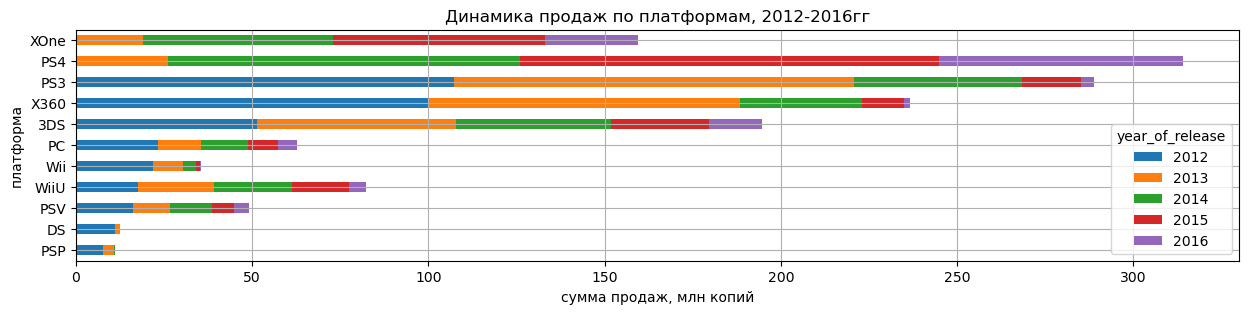

In [32]:
sales_dynamic = data_5year.pivot_table(index = 'platform', columns = 'year_of_release', 
                       values = 'total_sales', aggfunc = {'total_sales':'sum'})
sales_dynamic.sort_values(by = 2012).plot(
    kind= 'barh', grid = True, stacked=True, figsize = (15,3));
plt.title('Динамика продаж по платформам, 2012-2016гг') 
plt.xlabel('сумма продаж, млн копий')
plt.ylabel('платформа');

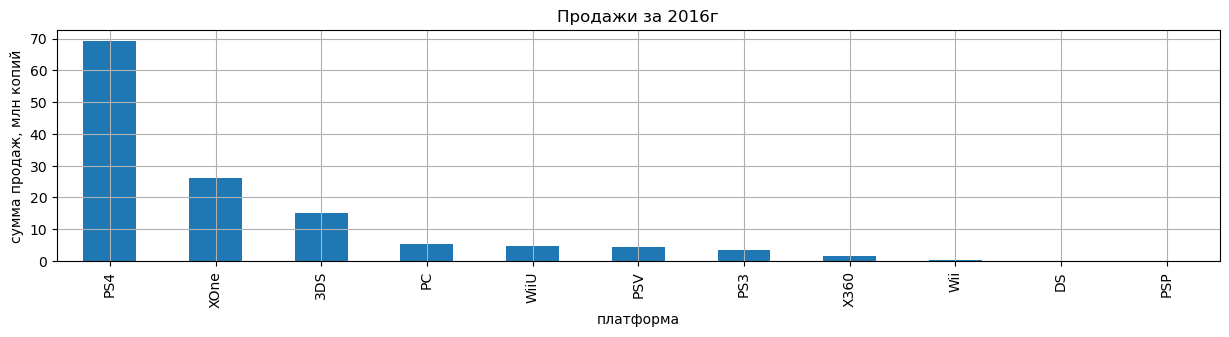

In [33]:
# зум на 2016г
sales_dynamic.sort_values(by = 2016, ascending = False)[2016].plot(
    kind='bar',figsize = (15,3), grid = True, title = 'Продажи за 2016г');
plt.xlabel('платформа')
plt.ylabel('сумма продаж, млн копий');

In [ ]:
top5 = ['PS4', 'PS3', 'X360', '3DS', 'XOne']
data_5year_top = data_5year.query('platform in @top5')
data_5year_top.pivot_table(index = 'year_of_release', columns = 'platform', 
                       values = 'total_sales', 
                        aggfunc = {'total_sales':'sum'}).plot(kind = 'area', figsize = (15,5), stacked = False, grid = True,
                                                             xticks = (2012, 2013, 2014, 2015, 2016), style='o-');
plt.title('Динамика продаж по топ5 платформам, 2012-2016гг')
plt.xlabel('год')
plt.ylabel('сумма продаж, млн копий');

По динамике количества продаж среди 11 платформ, которые выпускали игры в период 2012-2016, выделяются следующие особенности:
* лидеры: PS4, PS3, X360
* в течении анализируемого периода растут продажи у PS4 и XOne (c падением продаж в 2016г), остальные платформы имеют постоянный тренд на снижение количества продаж
* наиболее потенциально прибыльные платформы - PS4 и XOne


### 2.5 Глобальные продажи игр в разбивке по платформам


In [ ]:
data_5year.boxplot(column='total_sales', by = 'platform', figsize = (15,7));
plt.title('Продажи игр в 2012-2016гг в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('сумма продаж, млн копий')
plt.suptitle('');

Некоторые игры являются суперхитами и имеют продажи болеет 5млн копий. Для презентативной оценки продаж по платформам изменим масштаб для оси y.

In [ ]:
data_5year.boxplot(column='total_sales', by = 'platform', figsize = (15,7))
plt.title('Продажи игр в 2012-2016гг в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('сумма продаж, млн копий')
plt.suptitle('')
plt.ylim(0, 2);

График «ящик с усами» по глобальным продажам игр в разбивке по платформам показывает:
* есть несколько платформ, на которых выходили суперхиты с более 5млн продаж (3DS, PS3, PS4, Xbox360)
* по медианным продажам лидирует Xbox360, его же "ящик" является самым большим, немного отстает PS4
* самые скромные показатели у PSP и PSV

### 2.6 Влияние отзывов пользователей и критиков на продажи одной из платформ 

In [ ]:
ps3_data_5year = data_5year[data_5year['platform'] == 'PS3']
ps3_data_5year.plot(kind='scatter',
        y='critic_score' , x='total_sales', figsize=(10,4), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Рейтинг критиков — Количество продаж')
plt.xlabel('кол-во продаж, млн копий')
plt.ylabel('рейтинг критиков');

round(ps3_data_5year['total_sales'].corr(ps3_data_5year['critic_score']),3) # определим коэффициент корреляции

In [ ]:
ps3_data_5year.plot(kind='scatter',
        y='user_score' , x='total_sales', figsize=(10,4), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Рейтинг пользователей — Количество продаж')
plt.xlabel('кол-во продаж, млн копий')
plt.ylabel('рейтинг пользователей');

round(ps3_data_5year['total_sales'].corr(ps3_data_5year['user_score']),3) # определим коэффициент корреляции

In [ ]:
# зум на значениях менее 1млн продаж
ps3_data_5year['total_sales'].hist(figsize=(15,3), bins = 21, range = (0,1));
ps3_data_5year['total_sales'].describe()

Линейная корреляция между отзывами пользователей и критиков на продажи платформы PS3 отсутствует. 

Почти все игры на PS3 имеют количество продаж до 1млн копий

Вероятными причинами отсутствия корреляции могут быть:
* субъективные оценки пользователей, более объективной величиной оценки качества игры может быть как раз уровень продаж
* малое количество оценок пользователей, поэтому полученный рейтинг может быть не очень показательным



### 2.7 Влияние отзывов пользователей и критиков на продажи всех платформ 

In [ ]:
data_5year.plot(kind='scatter',
        y='critic_score' , x='total_sales', figsize=(10,4), c = 'b', s = 4, alpha = 0.5)
plt.title('Диаграмма рассеяния — Рейтинг критиков — Количество продаж')
plt.xlabel('кол-во продаж, млн копий')
plt.ylabel('рейтинг критиков');

round(data_5year['total_sales'].corr(data_5year['critic_score']),3) # определим коэффициент корреляции

In [ ]:
data_5year.plot(kind='scatter',
        y='user_score' , x='total_sales', figsize=(10,4), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Рейтинг пользователей — Количество продаж')
plt.xlabel('кол-во продаж, млн копий')
plt.ylabel('рейтинг критиков');

round(data_5year['total_sales'].corr(data_5year['user_score']),3) # определим коэффициент корреляции

Для всех платформ, характерны особенности, описанные для PS3 - отсутствие корреляции между данными параметрами.

### 2.8 Распределение игр по жанрам: самые прибыльные

In [ ]:
data_5year.pivot_table(index = 'genre', values = 'total_sales',  # расчет метрик по прибыльности жанров
                       aggfunc = {'total_sales': ['sum','median', 'mean','count']}).sort_values(by = 'median', ascending= False)

Больше всего продаж имеет жанр экшн, но в тоже время этот жанр имеет и наибольшее количество релизов.

Более репрезентативной метрикой является медианные продажи. Топ3 прибыльных жанра: Shooter (лидер), Sports и Platform.

## 3. Составление портрета пользователя каждого региона

### 3.1 Самые популярные платформы в NA, EU, JP (топ-5)

In [ ]:
na_platforms = data_5year.pivot_table(index = 'platform', values = 'na_sales', aggfunc = {'na_sales':'sum'}).sort_values(
    by = 'na_sales', ascending = False)
na_platforms['fraction'] = round(na_platforms['na_sales'] / data_5year.na_sales.sum(), 2)
na_platforms.head(5).plot(kind = 'pie', y='na_sales', legend = False);
plt.title('Доля продаж по платформам в Северной Америке') 
plt.ylabel('');
na_platforms.head(5)

In [ ]:
eu_platforms = data_5year.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = {'eu_sales':'sum'}).sort_values(
    by = 'eu_sales', ascending = False)
eu_platforms['fraction'] = round(eu_platforms['eu_sales'] / data_5year.eu_sales.sum(), 2)

eu_platforms.head(5).plot(kind = 'pie', y='eu_sales',legend = False);
plt.title('Доля продаж по платформам в Европе') 
plt.ylabel('');
eu_platforms.head(5)

In [ ]:
jp_platforms = data_5year.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = {'jp_sales':'sum'}).sort_values(
    by = 'jp_sales', ascending = False)
jp_platforms['fraction'] = round(jp_platforms['jp_sales'] / data_5year.jp_sales.sum(), 2)

jp_platforms.head(5).plot(kind = 'pie', y='jp_sales',legend = False);
plt.title('Доля продаж по платформам в Японии') 
plt.ylabel('');
jp_platforms.head(5)

В топ5 по регионам попали 7 разных платформ.

В Северной Америке и Европе 3/4 рынка занимают большие консоли Sony и Xbox - X360, PS4, PS3, XOne. 8-9% покупают игры на портативной консоли 3DS. Лидером в Северной Америке является американский X360 (0.24), в Европе - японская PS4(0.28). 

В Японии видим совсем другой тренд, другая "культура потребления" игр, большинство пользователей помимо упомянутой 3DS, покупают игры на PSV и WiiU - 0.64 пользователей используют портативные приставки. Также интересный момент - японцы не жалуют отсутствующий в топ5 американской Xbox, в отличии от отечественных Sony PS3 и PS4.

### 3.2 Самые популярные жанры в NA, EU, JP (топ-5)


In [ ]:
na_genres = data_5year.pivot_table(index = 'genre', values = 'na_sales', 
                       aggfunc = {'na_sales':'sum'}).sort_values(by = 'na_sales', ascending= False)
na_genres['fraction'] = round(na_genres['na_sales'] / data_5year.na_sales.sum(), 2)
na_genres.head(5).plot(kind = 'pie', y='na_sales', legend = False);
plt.title('Доля продаж по жанрам игр в Северной Америке')
plt.ylabel('');
na_genres.head(5)


In [ ]:
eu_genres = data_5year.pivot_table(index = 'genre', values = 'eu_sales', 
                       aggfunc = {'eu_sales':'sum'}).sort_values(by = 'eu_sales', ascending= False)
eu_genres['fraction'] = round(eu_genres['eu_sales'] / data_5year.eu_sales.sum(), 2)
eu_genres.head(5).plot(kind = 'pie', y='eu_sales', legend = False);
plt.title('Доля продаж по жанрам игр в Европе') 
plt.ylabel('');
eu_genres.head(5)

In [ ]:
jp_genres = data_5year.pivot_table(index = 'genre', values = 'jp_sales', 
                       aggfunc = {'jp_sales':'sum'}).sort_values(by = 'jp_sales', ascending= False)
jp_genres['fraction'] = round(jp_genres['jp_sales'] / data_5year.jp_sales.sum(), 2)
jp_genres.head(5).plot(kind = 'pie', y='jp_sales', legend = False);
plt.title('Доля продаж по жанрам игр в Японии')
plt.ylabel('');
jp_genres.head(5)

Первые 4 позиции в рейтинге жанров в Европе и Северной Америке идентичны - около 0.8 доли рынка занимают в порядке от самого популярного:  Action, Shooter, Sports, Role-Playing.

Япония и здесь выделяется 0.34 доли рынка занимает Role-Playing, а популярных европейских и американских жанров Shooter, Sports в японском топ5 нет.


### 3.3 Влияние рейтинга ESRB на продажи в отдельных регионах

При анализе мы держим в голове, что порядка 40% данных исходного массива не имеют информации по установленному рейтингу ESRB. Проверим, сколько пропусков в 2012-2016гг

In [ ]:
round(data_5year.rating.isna().sum()/data_5year.rating.isna().count(), 2) # кол-во пропусков в 2012-2016гг

In [ ]:
round(data_5year.total_sales.sum(),1) # всего продаж за 2012-2016гг

In [ ]:
# доля продаж за 2012-2016гг без пропущенных данных по рейтингу ESRB
round((data_5year.total_sales.sum() - 
       data_5year.loc[data_5year['rating'].isna(), 'total_sales'].sum()) / data_5year.total_sales.sum(), 2)

Значимая часть данных имеет информацию по рейтингу ESRB

In [ ]:
ESRB = data_5year.groupby('rating').agg(Nort_America=('na_sales','sum'))
ESRB['Europe'] = data_5year.groupby('rating').agg(Europe=('eu_sales','sum'))
ESRB['Japan'] = data_5year.groupby('rating').agg(Japan=('jp_sales','sum'))

ESRB = ESRB.T
ESRB.plot(kind = 'bar', grid = True,  figsize = (15,5));
plt.xlabel('регион')
plt.ylabel('кол-во продаж, млн копий');
plt.title('Рейтинг ESRB и продажи в отдельных регионах')

ESRB

В Северной Америке и Европе лидируют продаж игр с рейтингом М (17+ лет).

В Японии же продажа игр примерно одинаково распределяется между рейтингами Е(0+), Т(13+) и М(17+).

Можно сделать предположение, что игра с рейтингом 17+ (М) наверняка будет более успешна в Европе и Америке, нежели чем в Японии.

Вероятно это может быть связано с тем, что большая часть пользователей в мире - дети и подростки, а в Японии более строгие правила продаж игр, чем в других регионах, что не позволяет японцам широко использовать игры категории М. Так же вполне возможно, что доля детей, которые играют в компьютерные игры, значительно выше в Японии, чем в других регионах.

## 4. Проверка гипотез



Сформулируем и проверим следующие гипотезы:

### 4.1 Гипотеза 1

H0 - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 - cредние пользовательские рейтинги платформ Xbox One и PC разные

In [ ]:
xone_user_score = data_5year.query('platform == "XOne"')['user_score'].dropna()
pc_user_score = data_5year.query('platform == "PC"')['user_score'].dropna()

alpha = 0.05 

results = st.ttest_ind(xone_user_score, pc_user_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

### 4.2 Гипотеза 2

H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые

H1 - средние пользовательские рейтинги жанров Action и Sports разные

In [ ]:
action_score = data_5year.query('genre == "Action"')['user_score'].dropna()
sports_score = data_5year.query('genre == "Sports"')['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(action_score, sports_score, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:                               
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Критерий для проверки гипотез  - критерий Стьюдента, который чаще всего применяется для проверки равенства средних значений в двух выборках. Cтат. значимость выбрана равной 0.05, как достаточная для чувствительности исследуемого параметра. 

Большое значение p-value в первой гипотезе, которое не позволило отвергнуть нулевую гипотезу, может говорить нам о том, что средние рейтинги платформ Xbox One и PC достаточно близки. Это может быть вызвано выходом одних и тех же игр на этих платформах с близким уровнем качества, что обусловило и схожий пользовательский рейтинг.

С помощью т-теста мы опровергаем гипотезу о равенстве пользовательских рейтингов жанров Action и Sports в пользу альтернативной гипотезы, согласно которой средние рейтинги этих жанров разные.

## Выводы

Проведена аналитическая работа с данными продажах компьютерных игр: выполнена предобработка данных, выбран период для исследований, изучен ряд параметров, зависимости между ними, а также проверено несколько гипотез.

**В ходе предобработки данных было выполнено:** 
1. Приведение названий столбцов к нижнему регистру
2. Преобразование типов данных в столбцах годом релиза игр и пользовательским рейтингом
3. Удаление строк с пропусками, которые невозможно восстановить и использовать в анализе данных
4. Удаление неявных дубликатов


**В ходе исследования параметров за 1980-2016гг, выявлены следующие особенности:**
* Пик выпуска игр пришелся на конец нулевых годов 21 века
* Больше всего продано игр на PS2
* "Цикл жизни» платформы с большим объемом продаж – около 10 лет

**Проанализировав количество релизов игр по годам, был выбран интервал для нашего исследования: 2012-2016 года**

* Наиболее потенциально прибыльные платформы на текущий день - PS4 и XOne, их прошлые версии PS3 и X360 теряют популярность
* По медианным продажам лидирует Xbox360, немного отстает PS4
* Установлено, что для платформы PS3 нет зависимости между продажами и такими показателями как рейтингом пользователей и отзывы критиков. Аналогичная ситуация и для остальных общей выборки из всех платформ 
* Наиболее прибыльный жанр - шутер


**Составлен портрет пользователя для трех регионов:**
* Пользователи из Европы и Северной Америки предпочитают покупать игры на большие консоли Sony и Xbox: раньше это были X360 и PS3, сейчас фокус смещается на XOne и PS4. Американцы предпочитают свой продукт от Microsoft, европейцы – Sony. Играют и европейцы, и американцы в основном в  Action, Shooter, Sports, Role-Playing, которые занимают 80% от общих продаж. В Северной Америке и Европе лидируют продажи игр с рейтингом М (17+ лет)
* 64% пользователей из Японии используют портативные приставки: 3DS, PSV, WiiU, около 26% рынка у Sony: PS3 и PS4. Из популярных жанров в Европе и Северной Америке у японцев - экшн, а самый же популярный жанр - Role-Playing. В Японии же продажа игр примерно одинаково распределяется между рейтингами Е(0+), Т(13+) и М(17+)


**Проверены следующие гипотезы:**
1.	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - нулевая гипотеза "cредние пользовательские рейтинги платформ Xbox One и PC одинаковые" не отвергнута
2.	Средние пользовательские рейтинги жанров Action и Sports разные - нулевая гипотеза "средние пользовательские рейтинги жанров Action и Sports одинаковые" отвергнута
